In [157]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [158]:
train = pd.read_csv('train.csv')

In [159]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### First it is important to understand what each feature stands for:

#### Independent variables

1. PassengerId: A unique identifier for each passenger.
2. Pclass: Economic state. 1 stand for highest class and 3 stands for lowest class. 
3. Name: Passenger's name.
4. Sex: Gender, male or female.
5. Age: Passenger's age in years.
6. SibSp: Number of siblings/spouses.
7. Parch: Number of parents/children.
8. Ticket: Ticket number.
9. Fare: Ticket price.
10. Cabin: Cabin number.
11. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Dependent/predicted variable

Survived: Whether the passenger survived the disaster. No:0 , Yes:1


Before evidencing which features contain useful information, I think its best to try and use some intuition (by order of most intuitive to less intuitive):

1. Age should be informative for our model - younger ones should have higher survival rates. My assumption is that they may physically be more capable to survive or maybe their parents heroicly sacrificed themselves to help their children.
2. Pclass should be informative for our model - High class people may have connections and people who can keep them alive. Also, maybe their cabins are located closer to lifeboats (We want to keep more paying customers alive..)
3. Fare should be informative - Paying more for a ticket could imply higher survival rate (higher location on the ship, or maybe closer to lifeboats).
4. Sex could be informative - We've all seen Titanic! It's intuitive to think that men would heroicly die in order to save their women (especially if they were pregnant, but we don't really know that for sure) and therefore women are more likely to survive.
5. SibSp & Parch - This one may be tricky and therefore requires exploration. Having family members with you on board could imply that there might be someone who would help you survive, but on the other hand someone who you would die saving. There may be a slight effect on which kind of family member you're travelling with but I've decided to look on the number of family members, rather than their kind so both columns will be merged to a 'Family' column.

In [160]:
train_family = pd.Series(train['SibSp'] + train['Parch'], name='Family')
train['Family']=train_family
train.drop(['SibSp', 'Parch'], axis=1, inplace = True)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

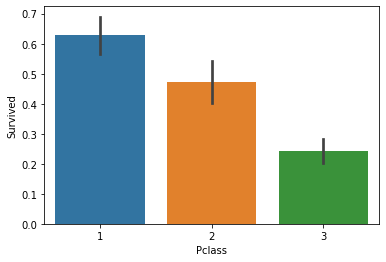

In [161]:
sns.barplot(x=train['Pclass'], y=train['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

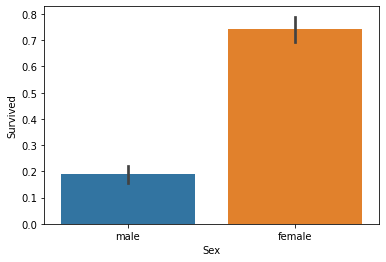

In [162]:
sns.barplot(x=train['Sex'], y=train['Survived'])

<AxesSubplot:xlabel='Family', ylabel='Survived'>

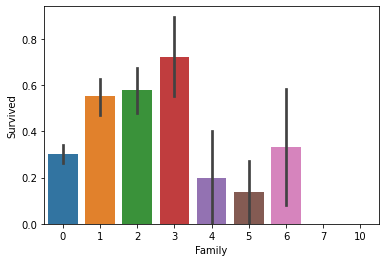

In [163]:
sns.barplot(x=train['Family'], y=train['Survived'])

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

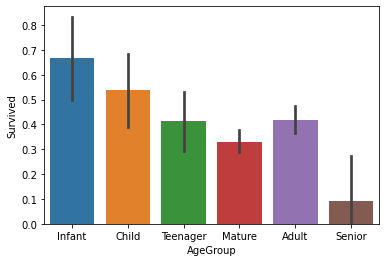

In [164]:
# Infant: 0-3 |  Child: 3-13 | 'Teenager': 13-28 and so on..

#Impute with median
train['Age'] = train['Age'].fillna(train.Age.median())

group_ranges = [0,3,13,18,30,64,np.inf]
age_groups = ['Infant', 'Child','Teenager', 'Mature', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'], bins=group_ranges, labels = age_groups)

sns.barplot(x=train['AgeGroup'], y=train['Survived'])

In [165]:
# We won't include Cabin
train.drop(['Cabin'], axis=1, inplace=True)

<AxesSubplot:>

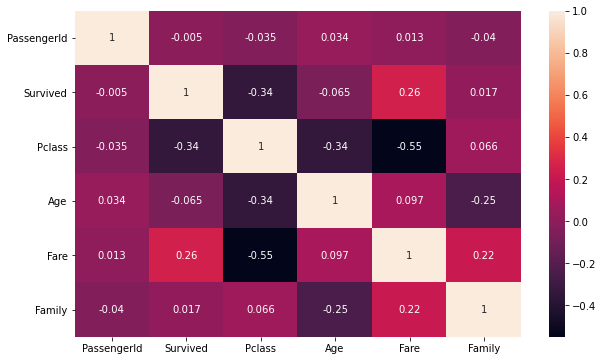

In [166]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot = True)

#### Conclusions:

1. Age : Infants had the highest survival rates, after them children and on the 3rd place teenagers & adults. Sadly but not surprisingly, seniors had the lowest.
2. Sex : Perhaps without Leonardo's heroic move (some would suggest that there was room for him too, but that's not for me to judge..) the intuition would have had to land from somewhere else. Anyways, the assumption was correct - higher survival rates for women.
3. Fare : From the following heatmap we can see some useful information. First there is a positive correlation between Fare and Survival, as assumed. Also, there is a high correlation between Fare and Pclass - so high class do pay more (not surprising..) and therefore both features should be informative for us. Also notice that we can't get enough information on 'Age' from the heatmap. I have solved it using discretization (inspired by some notebook's I've seen and by exploring pandas documentation on 'cut' function.)
4. SibSp & Parch : This part is of more importance to me since I really had no intuition on the survival rates here. Surprisingly, higher survival rates were for those who travelled with 2-4 family members. (This may be important information for you before choosing your next cruise's companions, just saying..)
5. Pclass : High class had higher survival rates. Also, from the heatmap we can see a negative correlation between 'Survived' and 'Pclass' which means that the the survival rates increase as the economic class increases - as expected.

In [167]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       2
Family         0
AgeGroup       0
dtype: int64

In [168]:
# One-Hot encode 'Emarked' and remove 2 missing values.
train = pd.get_dummies(data=train, columns=['Embarked'], drop_first=True)

In [169]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Family         0
AgeGroup       0
Embarked_Q     0
Embarked_S     0
dtype: int64

### Convert to numerical

Many machine learning models can only handle numerical input, so we need to map them.

In [170]:
sex_map = {'male':1, 'female':2}
age_group_map ={'Infant':1, 'Child':2, 'Teenager':3, 'Mature':4, 'Adult':5, 'Senior':6}

train['Sex'] = train['Sex'].map(sex_map)
train['AgeGroup'] = train['AgeGroup'].map(age_group_map).astype('int64')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Family       891 non-null    int64  
 9   AgeGroup     891 non-null    int64  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), object(2), uint8(2)
memory usage: 71.5+ KB


Now let's get rid of features we don't need - either because they are not enough informative, or we've used them to create different ones (like Family=SibSp+Parch, AgeGroup from Age).

Also, let's fill missing values for test.

<AxesSubplot:xlabel='Fare'>

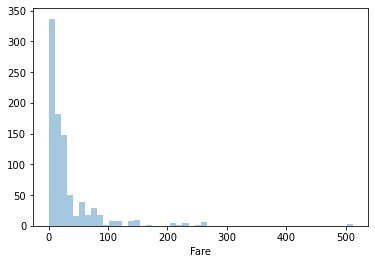

In [171]:
sns.distplot(a=train['Fare'], kde=False)

In [172]:
# Quantize 'Fare'
rank_ranges = [0,8, 15, 30, np.inf]
fare_ranks = [1,2,3,4]

train['FareRank'] = pd.cut(train['Fare'], bins=rank_ranges, labels = fare_ranks)

<AxesSubplot:xlabel='FareRank'>

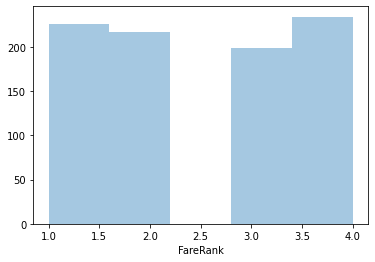

In [173]:
sns.distplot(a=train['FareRank'], kde=False)

In [174]:
# Leave only important features
train = train.drop(['PassengerId', 'Name', 'Ticket','Fare', 'Age'], axis=1)

In [175]:
y = train['Survived']
X = train.drop(['Survived'], axis=1)

In [176]:
X.head()

,Pclass,Sex,Family,AgeGroup,Embarked_Q,Embarked_S,FareRank
0,3,1,1,4,0,1,1
1,1,2,1,5,0,0,4
2,3,2,0,4,0,1,1
3,1,2,1,5,0,1,4
4,3,1,0,5,0,1,2


## Model selection

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
preds = log_reg.predict(X_valid)
lr_acc = accuracy_score(preds, y_valid)
print(lr_acc)

0.5865921787709497


In [180]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)
preds = gauss.predict(X_valid)
NB_acc = accuracy_score(preds, y_valid)
print(NB_acc)

0.4245810055865922


In [181]:
svc = SVC()
svc.fit(X_train, y_train)
preds = svc.predict(X_valid)
svc_acc = accuracy_score(preds, y_valid)
print(svc_acc)

0.5865921787709497


In [182]:
perc = Perceptron()
perc.fit(X_train, y_train)
preds = perc.predict(X_valid)
perc_acc = accuracy_score(preds, y_valid)
print(perc_acc)

0.7653631284916201


In [183]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
preds = dtc.predict(X_valid)
dtc_acc = accuracy_score(preds, y_valid)
print(dtc_acc)

0.7877094972067039


In [184]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
preds = rfc.predict(X_valid)
rfc_acc = accuracy_score(preds, y_valid)
print(rfc_acc)

0.7988826815642458


In [185]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_valid)
knn_acc = accuracy_score(preds, y_valid)
print(knn_acc)

0.8100558659217877


In [186]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
preds = sgd.predict(X_valid)
sgd_acc = accuracy_score(preds, y_valid)
print(sgd_acc)

0.5865921787709497


In [187]:
xgb = GradientBoostingClassifier()
xgb.fit(X_train, y_train)
preds = xgb.predict(X_valid)
xgb_acc = accuracy_score(preds, y_valid)
print(xgb_acc)

0.8268156424581006


In [188]:
models = pd.Series(['LogisticRegression', 'GaussianNB', 'SVM', 'Perceptron',
                   'DecisionTree', 'RandomForest', 'KNN', 'SGDClassifier', 'GradientBoostingClassifier'])
accuracies = pd.Series([lr_acc, NB_acc, svc_acc, perc_acc,
                       dtc_acc, rfc_acc, knn_acc, sgd_acc, xgb_acc])
scores = pd.DataFrame({'Model':models, 'Accuracies':accuracies}).sort_values(['Accuracies'], ascending=False)
scores

,Model,Accuracies
8,GradientBoostingClassifier,0.826816
6,KNN,0.810056
5,RandomForest,0.798883
4,DecisionTree,0.787709
3,Perceptron,0.765363
0,LogisticRegression,0.586592
2,SVM,0.586592
7,SGDClassifier,0.586592
1,GaussianNB,0.424581


In [189]:
from sklearn.model_selection import RandomizedSearchCV

In [190]:
# GradientBoosting hyperparameter tuning
learning_rates = [0.001, 0.01, 0.1, 1]
n_estimators = [100, 250, 500 ,1000]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_depth = [5,10,15,20]

params = {'learning_rate':learning_rates,
         'n_estimators':n_estimators,
         'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf,
         'max_depth':max_depth}


gbc = GradientBoostingClassifier()
grid_search = RandomizedSearchCV(estimator=gbc, param_distributions=params, scoring='accuracy', n_iter=10,
                                 cv=5, verbose=2, random_state=42, n_jobs=4)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   19.5s finished


0.8244361272530287
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.01}


In [191]:
criterion=['gini', 'entropy']
n_estimators = [100, 250, 500 ,1000]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_depth = [5,10,15,20]

params = {'n_estimators':n_estimators,
         'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf,
         'max_depth':max_depth,
         'criterion':criterion}


rfc = RandomForestClassifier()
grid_search = RandomizedSearchCV(estimator=rfc, param_distributions=params, scoring='accuracy', n_iter=10,
                                 cv=5, verbose=2, random_state=42, n_jobs=4)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   15.0s finished


0.8314291342460356
{'n_estimators': 1000, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'gini'}


In [192]:
n_neighbors = [5,8,11,14]


params = {'n_neighbors':n_neighbors}


knn = KNeighborsClassifier()
grid_search = RandomizedSearchCV(estimator=knn, param_distributions=params, scoring='accuracy', n_iter=10,
                                 cv=5, verbose=2, random_state=42, n_jobs=4)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.8145671230178273
{'n_neighbors': 14}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


In [193]:
# Use our best results from each model on the validation set
best_gbc = GradientBoostingClassifier(n_estimators=500, min_samples_split=10,
                                 min_samples_leaf=1, max_depth=5, learning_rate=0.01)
best_rfc = RandomForestClassifier(n_estimators= 1000, min_samples_split= 10, min_samples_leaf=5,
                                  max_depth= 20, criterion= 'gini')
best_knn = KNeighborsClassifier(n_neighbors=14)

models = [best_gbc, best_rfc, best_knn]
for model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    print(f'Accuracy = {accuracy_score(y_valid, preds)}')

Accuracy = 0.8156424581005587
Accuracy = 0.8100558659217877
Accuracy = 0.8156424581005587


## Conclusion:

Top accuracy on the validation set was achieved by GradientBoosting and KNN.